## 1. Introduce
Đối với các bạn học deep learning thì không thể không biết tới RNN, một thuật toán cực kì quan trọng chuyên xử lý thông tin dạng chuỗi. Đầu tiên, hãy nhìn xem RNN có thể làm gì. Dưới đây là một vài ví dụ.

Machine Translation (Dịch máy)
Mô hình hóa ngôn ngữ và sinh văn bản: đây có lẽ là khả năng ấn tượng nhất đối với mình.
Nhận dạng giọng nói
Mô tả hình ảnh: RNN kết hợp cùng CNN để sinh ra mô tả cho hình ảnh chưa được gán nhãn. Đây cũng là một bài tập khá hay mà mình sẽ giới thiệu trong bài viết tiếp theo.
Vậy, làm sao RNN làm được những việc này? Hi vọng thông qua bài viết này mình có thể cung cấp một cái nhìn rõ ràng và dễ hiêủ về RNN.
## 2. Dữ liệu dạng sequence
Trong bài toán dự đoán đột quỵ tim cho bệnh nhân bằng các dữ liệu tim mạch khám trước đó. Input là dữ liệu của những lần khám trước đó, ví dụ i1 là lần khám tháng 1, i2 là lần khám tháng 2,… i8 là lần khám tháng 8. (i1,i2,..i8) được gọi là sequence data. RNN sẽ học từ input và dự đoán xem bệnh nhân có bị đột quy tim hay không.

Ví dụ khác là trong bài toán dịch tự động với input là 1 câu, ví dụ “tôi yêu Việt Nam” thì vị trí các từ và sự xắp xếp cực kì quan trọng đến nghĩa của câu và dữ liệu input các từ [‘tôi’, ‘yêu’, ‘việt’, ‘nam’] được gọi là sequence data. Trong bài toán xử lý ngôn ngữ (NLP) thì không thể xử lý cả câu được và người ta tách ra từng từ làm input, giống như trong video người ta tách ra các ảnh (frame) làm input.
### Phân loại bài toán RNN

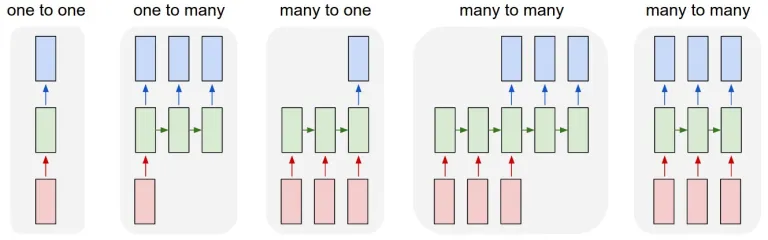

**One to one:** mẫu bài toán cho Neural Network (NN) và Convolutional Neural Network (CNN), 1 input và 1 output, ví dụ với CNN input là ảnh và output là ảnh được segment.

**One to many:** bài toán có 1 input nhưng nhiều output, ví dụ: bài toán caption cho ảnh, input là 1 ảnh nhưng output là nhiều chữ mô tả cho ảnh đấy, dưới dạng một câu.

**Many to one:** bài toán có nhiều input nhưng chỉ có 1 output, ví dụ bài toán phân loại hành động trong video, input là nhiều ảnh (frame) tách ra từ video, ouptut là hành động trong video

**Many to many:** bài toán có nhiều input và nhiều output, ví dụ bài toán dịch từ tiếng anh sang tiếng việt, input là 1 câu gồm nhiều chữ: “I love Vietnam” và output cũng là 1 câu gồm nhiều chữ “Tôi yêu Việt Nam”.

### Ứng dụng bài toán RNN
Về cơ bản nếu bạn thấy sequence data hay time-series data và bạn muốn áp dụng deep learning thì bạn nghĩ ngay đến RNN. Dưới đây là một số ứng dụng của RNN:

- **Speech to text:** Chuyển giọng nói sang text.
- **Sentiment classification:** phân loại số sao cho các bình luận, ví dụ: input: “ứng dụng tốt”, output: 4 sao.
- **Machine translation:** Bài toán dịch tự động giữa các ngôn ngữ.
- **Video recognition:** Nhận diện hành động trong video.
- **Heart attack:** Dự đoán đột quỵ tim.
….

## 3. Recurrent neuron network
Bài toán: Nhận diện hành động trong video 30s. Đây là dạng bài toán many to one trong RNN, tức nhiều input và 1 output.

Input ta sẽ tách video thành 30 ảnh ở mỗi giây. Các ảnh sẽ được cho qua model CNN để lấy ra các feature (feature extraction) thành các vector có kích thước n*1. Vector tương ứng với ảnh ở giây thứ i là xi

Output là vector có kích thước d*1, softmax function được sử dụng như trong bài phân loại ảnh.

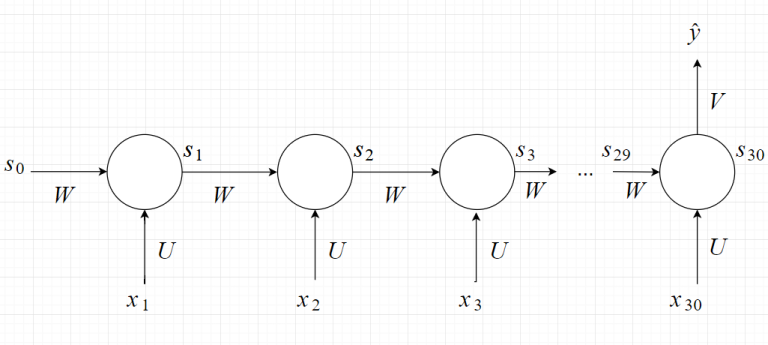

Ta có:

Mô hình có 30 input và 1 output. Các input được cho vào model đúng với thứ tự ảnh trong video 
$x_1, x_2, \dots, x_{30}$.

Mỗi hình tròn được gọi là một **state**. State $t$ có:
- Input là $x_t$ và $s_{t-1}$ (output của state trước).
- Output là:
  $$
  s_t = f(U \cdot x_t + W \cdot s_{t-1})
  $$
  Trong đó:
  - $f$ là hàm activation, thường là **tanh** hoặc **ReLU**.

Có thể thấy:
- $s_t$ mang cả thông tin từ state trước ($s_{t-1}$) và input của state hiện tại ($x_t$).
- Do đó, $s_t$ giống như **memory**, nhớ các đặc điểm của các input từ $x_1$ đến $x_t$.

Một số chi tiết khác:
- $s_0$: được thêm vào chỉ để chuẩn hóa công thức, thường được gán bằng 0 hoặc một giá trị ngẫu nhiên (vì ban đầu chưa có dữ liệu gì để học nên memory rỗng).
- Chỉ có **một output**, được đặt ở state cuối cùng. Khi đó, $s_{30}$ đã học được thông tin từ tất cả các input.

Output của mô hình:
$$
\hat{y} = g(V \cdot s_{30})
$$
- $g$ là hàm activation, trong bài toán này là bài toán phân loại nên sẽ dùng **softmax**.

Hình ảnh dưới đây sẽ cho thấy rõ những gì bên trong mỗi state

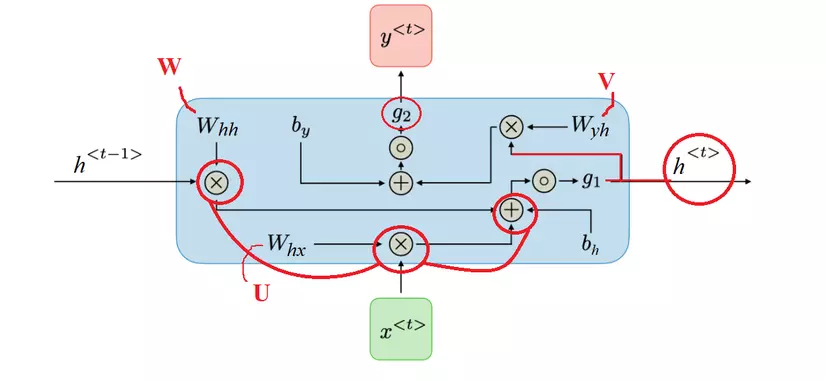

Ta thấy là ở mỗi state các hệ số W, U là giống nhau nên model có thể được viết lại thành:
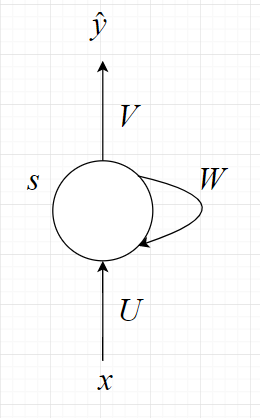

Tóm lại:

- $x_i$ là vector có kích thước $n \times 1$.
- $s_i$ là vector có kích thước $m \times 1$.
- $y_i$ là vector có kích thước $d \times 1$.
- $U$ là ma trận có kích thước $m \times n$.
- $W$ là ma trận có kích thước $m \times m$.
- $V$ là ma trận có kích thước $d \times m$.

Công thức:
- $s_0 = 0$
- $s_t = f(U \cdot x_t + W \cdot s_{t-1})$ với $t \geq 1$
- $\hat{y} = g(V \cdot s_{30})$
### Loss function( tùy bài toán thì loss sẽ tính khác nhau )
Loss function của cả mô hình bằng tổng loss của mỗi output, tuy nhiên ở mô hình trên chỉ có 1 output và là bài toán phân loại nên categorical cross entropy loss sẽ được sử dụng.
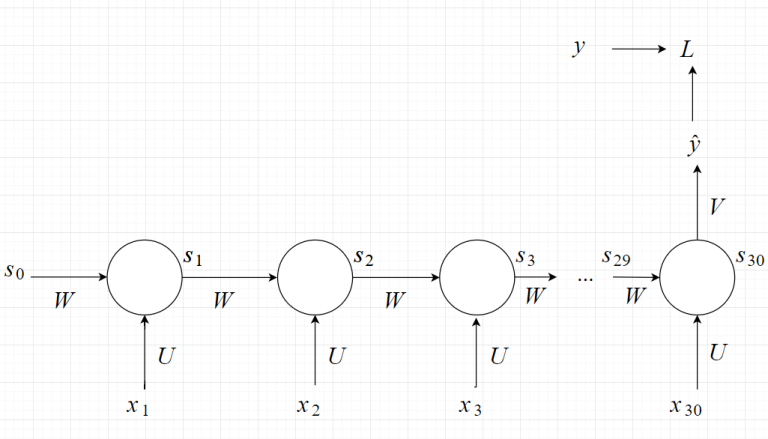

## 4. Vì sao RNN bị **bùng nổ** hoặc **biến mất đạo hàm**?

RNN hoạt động dựa trên việc truyền thông tin qua các bước thời gian (timesteps), nhưng quá trình này dễ gặp hai vấn đề chính:

---

#### 1. **Biến mất đạo hàm** (*Vanishing Gradient*):
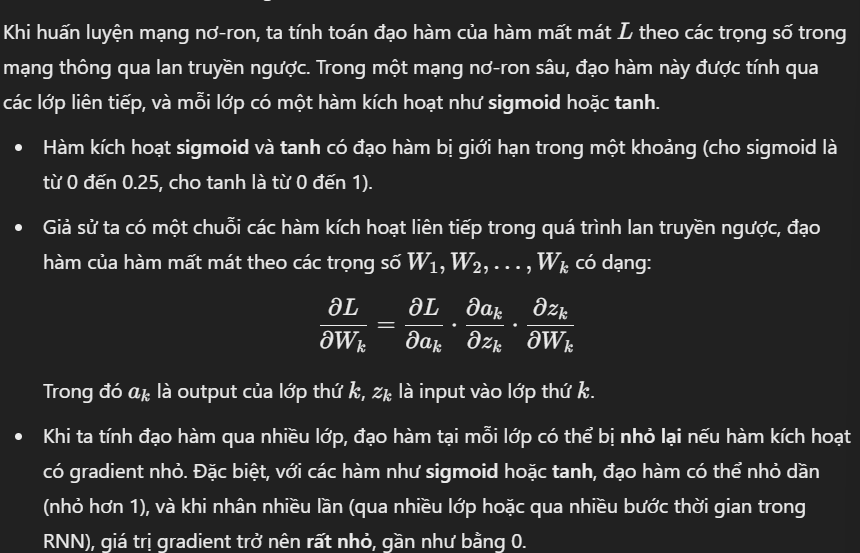
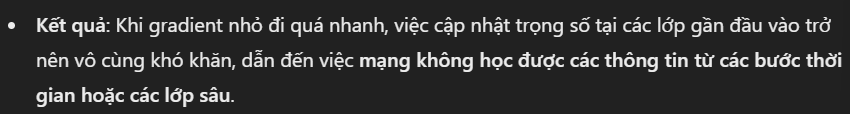

#### 2. **Bùng nổ đạo hàm** (*Exploding Gradient*):

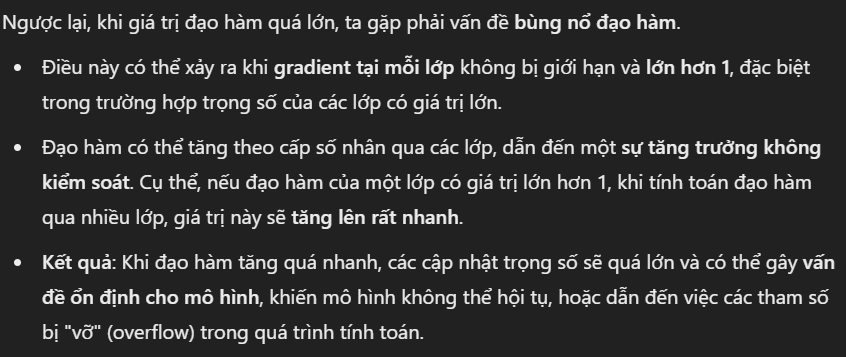
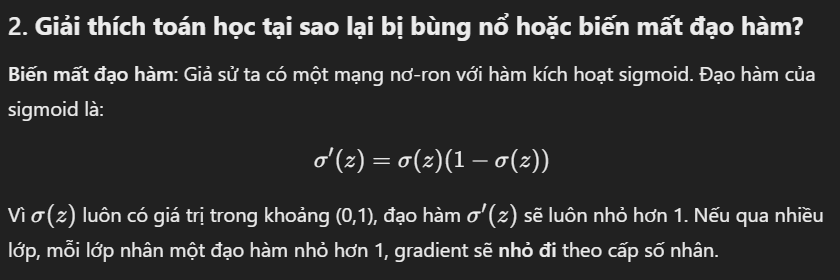
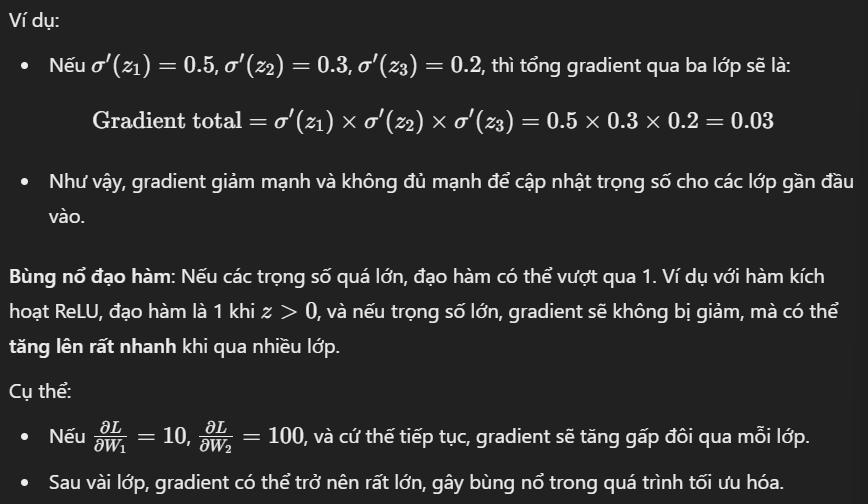
### Giải thích dễ hiểu:
- Hãy tưởng tượng bạn cố gắng truyền tải một câu chuyện dài qua một chuỗi người (tương tự như RNN qua nhiều bước thời gian).
  - Nếu mỗi người **quên phần lớn nội dung** khi truyền (biến mất đạo hàm), thông tin ban đầu sẽ không đến được người cuối.
  - Nếu mỗi người **khuếch đại quá mức** một phần nội dung (bùng nổ đạo hàm), câu chuyện sẽ trở nên rối loạn và không chính xác.

